# Documentation for the creation and usage of the heatpump library (hplib)




In [24]:
import hplib as hpl
import hplib_database as db
import pandas as pd
import matplotlib.pyplot as plt

## Defintions

**Abbreviations**

| Abbreviation | Meaning |
| --- | --- |
| P_th | Thermal output power in W |
| P_el | Electical input Power in W |
| COP | Coefficient of performance |
| T_in | Input temperature in °C at primary side of the heat pump |
| T_out | Output temperature in °C at secondary side of the heat pump |
| P_th_ref | Thermal output power in W at T_in = -7 °C and T_out = 52 °C |
| P_el_ref | Elecrical output power in W at T_in = -7 °C and T_out = 52 °C |
| COP_ref | Coefficient of performance at T_in = -7 °C and T_out = 52 °C |
| p1,p2,p3 | Fit-Parameters for Fit-Function |


**Group IDs**

| Group ID | Type | Subtype |
| --- | --- | --- |
| 1 | Outdoor Air / Water | Inverter | 
| 2 | Brine / Water | Inverter | 
| 3 | Water / Water | Inverter | 
| 4 | Outdoor Air / Water | On-Off | 
| 5 | Brine / Water | On-Off | 
| 6 | Water / Water | On-Off | 
| 7 | Outdoor Air / Water | 2-Stages | 
| 8 | Brine / Water | 2-Stages |
| 9 | Water / Water | 2-Stages |

## Database Preparation
1. we downloaded all manufacturer data from https://keymark.eu/en/products/heatpumps/certified-products
2. then we unzipped the files and used the bash-skript to convert pdf into txt
3. afterwards we used this following functions to create and extent the heatpump keymark database

In [ ]:
# Import keymark data and save to csv database
db.ImportKeymarkData()
# -> this creates /output/database_keymark.csv)

In [ ]:
# Reduce to climate measurement series with average climate, delete redundant entries and save to csv sub-database
db.ReduceKeymarkData('database_keymark.csv','average')
# -> this creates /output/database_keymark_average.csv)

In [ ]:
# Normalize electrical and thermal power from the keymark database to values from setpoint T_in = -7 °C and T_out = 52 °C
db.NormalizeKeymarkData('database_keymark_average.csv')
# -> this creates /output/database_keymark_average_normalized.csv)

In [ ]:
# Identify subtypes like On-Off, Inverter and 2-stages Heatpump and assign group depending on its type and subtype
db.IdentifySubtypes('database_keymark_average_normalized.csv')
# -> this creates /output/database_keymark_average_normalized_subtypes.csv)

In [ ]:
#Calculate parameters p1-p3 for P_th, P_el and COP
db.CalculateFunctionParameters('database_keymark_average_normalized_subtypes.csv')
# -> this creates the final hplib_database.csv

In [ ]:
#Calculate generic heatpump models for each group
db.addGeneric()
# -> this overwrites the hplib_database.csv

In [4]:
#Reduce to unique heat pump models
db.ReduceToUnique()
# -> this overwrites the hplib_database.csv

## Usage for simulation

In [5]:
# Have a look into the hplib database
database = hpl.loadDatabase()
database

,Manufacturer,Model,Date,Type,Subtype,Group,Refrigerant,Mass of Refrigerant [kg],SPL indoor [dBA],SPL outdoor [dBA],...,COP_ref,p1_P_th [1/°C],p2_P_th [1/°C],p3_P_th [-],p1_P_el [1/°C],p2_P_el [1/°C],p3_P_el [-],p1_COP [-],p2_COP [-],p3_COP [-]
0,Advantix,i-SHWAK V4 06,2020-05-26,Outdoor Air/Water,Inverter,1.0,R410a,2.68,35.0,64.0,...,1.57,-0.023538,-0.010648,1.284505,-0.025556,0.008232,0.220768,0.141637,-0.042594,4.862194
1,Advantix,i-SHWAK V4 08,2020-05-26,Outdoor Air/Water,Inverter,1.0,R410a,2.20,35.0,64.0,...,1.72,-0.013904,-0.001533,0.923861,-0.023954,0.010072,0.169400,0.145611,-0.039244,4.806861
2,Advantix,i-SHWAK V4 10,2020-05-26,Outdoor Air/Water,Inverter,1.0,R410a,3.45,39.0,64.0,...,1.65,-0.010242,-0.007511,1.230385,-0.024239,0.009813,0.193147,0.169958,-0.073052,6.208807
3,Advantix,i-SHWAK V4 12,2020-05-26,Outdoor Air/Water,Inverter,1.0,R410a,3.45,39.0,65.0,...,2.00,-0.010428,0.001136,0.857530,-0.023218,0.011195,0.183846,0.123111,-0.077418,6.435368
4,Advantix,i-SHWAK V4 14,2020-05-26,Outdoor Air/Water,Inverter,1.0,R410a,4.40,40.0,68.0,...,1.80,-0.022154,-0.004372,0.964376,-0.028869,0.008636,0.220116,0.157131,-0.059670,5.518696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Generic,Generic,NaN,Brine/Water,On-Off,5.0,NaN,NaN,NaN,NaN,...,2.87,-0.001788,-0.005992,1.294020,0.004298,0.015276,0.241917,-0.031898,-0.103930,8.054636
518,Generic,Generic,NaN,Water/Water,On-Off,6.0,NaN,NaN,NaN,NaN,...,3.47,-0.001205,-0.005386,1.269886,0.001229,0.014158,0.255343,-0.011252,-0.109918,9.107949
519,Generic,Generic,NaN,Outdoor Air/Water,2-Stages,7.0,NaN,NaN,NaN,NaN,...,1.73,-0.012521,-0.001829,1.115788,-0.019676,0.013572,0.184662,0.105186,-0.065788,5.883714
520,Generic,Generic,NaN,Brine/Water,2-Stages,8.0,NaN,NaN,NaN,NaN,...,3.16,-0.032373,-0.002487,0.985405,-0.019649,0.012755,0.236877,-0.021645,-0.082128,7.274540


In [7]:
# Define a specific heatpump model and get parameters
parameters = hpl.getParameters('i-SHWAK V4 06')
parameters

,Model,P_th_ref [W],P_el_ref [W],COP_ref,Group,p1_P_th [1/°C],p2_P_th [1/°C],p3_P_th [-],p1_P_el [1/°C],p2_P_el [1/°C],p3_P_el [-],p1_COP [-],p2_COP [-],p3_COP [-]
0,i-SHWAK V4 06,4500.0,2866.0,1.57,1.0,-0.023538,-0.010648,1.284505,-0.025556,0.008232,0.220768,0.141637,-0.042594,4.862194


In [8]:
# Alternatively, define a "Generic" heatpump model and get parameters
# For every Group ID there is a parameter set which represents an average heatpump of its group
# Please define the Type "Generic", the Group ID (1-9) and P_th_ref in W
parameters = hpl.getParameters('Generic',1,10000)
parameters

,Model,P_th_ref [W],P_el_ref [W],COP_ref,Group,p1_P_th [1/°C],p2_P_th [1/°C],p3_P_th [-],p1_P_el [1/°C],p2_P_el [1/°C],p3_P_el [-],p1_COP [-],p2_COP [-],p3_COP [-]
0,Generic,10000,7126.222656,1.403268,1.0,-0.030129,-0.003598,0.916915,-0.030809,0.009418,0.19111,0.153743,-0.088007,7.055812


In [9]:
# Simulate on time step
# Please define T_in_primary, T_in_secondary in °C and the parameters from the previous step 
# The T_in_secondary is supposed to be heated up by 5 K which then results in T_out
# For a time series create a loop with the function
P_th, P_el, COP = hpl.simulate(-7, 47, parameters)
print('P_th: '+str(int(P_th))+' W')
print('P_el: '+str(int(P_el))+' W')
print('COP: '+str(round(COP,3)))

P_th: 8965 W
P_el: 6388 W
COP: 1.403


**Very important:** With the Fit-Parameters p1-p3 for P_th, P_el and COP it is possible to calculate the results with the following methods:

1. P_th and P_el with Fit-Functions and `COP = P_th / P_el`
2. P_th and COP with Fit-Functions and `P_el = P_th / COP`
3. P_el and COP with Fut-Functions and `P_th = P_el * COP`

While the model by Schwarmberger et. al. uses the 1. method, our validation showed, that the 3. method results in better results. Therefore we decided to implement this in the `simulate` definition.

## Examples

**Schematic plotting** of P_th, P_el and COP for an generic air/water heat pump: subtype = **On-Off** 

Text(0, 0.5, 'COP')

<Figure size 432x288 with 0 Axes>

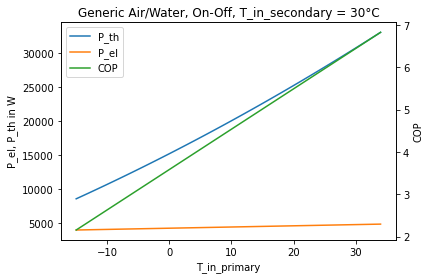

In [34]:
# Define Temperatures
T_in_primary = range(-15, 35) # air temperatur
T_in_secondary = 30 # e.g. temperature from hot water storage

# Load parameters of Generic Air/Water, On-Off
parameters = hpl.getParameters('Generic', 4, 10000)

# Simulate 
names = ['T_in_primary','P_th', 'P_el', 'COP']
data = []

for t in T_in_primary:
    P_th, P_el, COP = hpl.simulate(t, T_in_secondary, parameters)
    data.append([t, P_th, P_el, COP])

results = pd.DataFrame(data, columns=names)

# Plot
plt.figure()
ax = results.plot(x='T_in_primary', secondary_y=['COP'], mark_right=False, title='Generic Air/Water, On-Off, T_in_secondary = 30°C')
ax.set_ylabel('P_el, P_th in W')
ax.right_ax.set_ylabel('COP')

**Schematic plotting** of P_th, P_el and COP for an generic air/water heat pump: subtype = **Inverter** 

Text(0, 0.5, 'COP')

<Figure size 432x288 with 0 Axes>

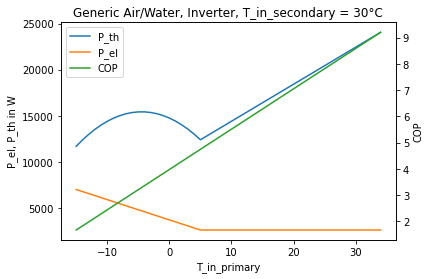

In [35]:
# Load parameters of Generic Air/Water, Inverter
parameters = hpl.getParameters('Generic', 1, 10000)

# Simulate 
names = ['T_in_primary','P_th', 'P_el', 'COP']
data = []

for t in T_in_primary:
    P_th, P_el, COP = hpl.simulate(t, T_in_secondary, parameters)
    data.append([t, P_th, P_el, COP])

results = pd.DataFrame(data, columns=names)

# Plot
plt.figure()
ax = results.plot(x='T_in_primary', secondary_y=['COP'], mark_right=False, title='Generic Air/Water, Inverter, T_in_secondary = 30°C')
ax.set_ylabel('P_el, P_th in W')
ax.right_ax.set_ylabel('COP')